# T-Series YouTube Channel Analysis


T-Series is the most popular YouTube channel with staggering statistics. This notebook performs an advanced analysis of two datasets:
    
1. `all_stats_t_series.csv` - contains statistics of all videos on T-Series channel.
2. `top_1000_details.csv` - contains details of the top 1000 videos by view count.

This analysis includes data cleaning, exploratory data analysis (EDA), visualization, sentiment analysis, and time series analysis.
    

## Importing Required Libraries and Datasets

In [1]:
import pandas as pd

all_stats_df = pd.read_csv('/kaggle/input/t-series-indias-largest-music-record-label/all_stats_t_series.csv')
top_1000_details_df = pd.read_csv('/kaggle/input/t-series-indias-largest-music-record-label/top_1000_details.csv')

all_stats_df.head(), top_1000_details_df.head()


(            id  viewCount  likeCount  favoriteCount  commentCount
 0  c_VrTcIY8kA     233296    82028.0              0       13239.0
 1  GHyHfi7fnGQ      81592     4432.0              0         535.0
 2  SIN9YUhH6cU      31523     1436.0              0         209.0
 3  tPRge7PMVeM      45149      997.0              0         127.0
 4  UlrZOaT8ays      26186     2108.0              0          42.0,
             id   viewCount   likeCount  favoriteCount  commentCount  \
 0  BBAyRBTfsOU  1589926035  13163890.0              0        359141   
 1  sCbbMZ-q4-I  1394834659  11013187.0              0        341677   
 2  JFcgOboQZ08  1306259000   5587227.0              0        188513   
 3  vu5-aKf_QqA  1235684404   3569186.0              0         84749   
 4  f6vY6tYvKGA  1222902136   4065996.0              0         94157   
 
                                                title  \
 0  Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...   
 1  Lut Gaye (Full Song) Emraan Hashmi, Yukti | J

## Data Cleaning and Preprocessing

In [2]:
all_stats_df.fillna(0, inplace=True)
top_1000_details_df.fillna('', inplace=True)

top_1000_details_df['published_at'] = pd.to_datetime(top_1000_details_df['published_at'])
top_1000_details_df['likeCount'] = pd.to_numeric(top_1000_details_df['likeCount'], errors='coerce')

all_stats_df.describe(), top_1000_details_df.describe()


/tmp/ipykernel_18/2469190805.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  top_1000_details_df.fillna('', inplace=True)


(          viewCount     likeCount  favoriteCount   commentCount
 count  1.985800e+04  1.985800e+04        19858.0   19858.000000
 mean   1.260461e+07  9.275963e+04            0.0    2703.479807
 std    5.785160e+07  3.779600e+05            0.0   12516.655943
 min    0.000000e+00  0.000000e+00            0.0       0.000000
 25%    8.419475e+04  8.012500e+02            0.0      44.000000
 50%    3.761185e+05  4.419000e+03            0.0     202.000000
 75%    2.760865e+06  2.788475e+04            0.0     993.000000
 max    1.589926e+09  1.316389e+07            0.0  419265.000000,
           viewCount     likeCount  favoriteCount   commentCount
 count  1.000000e+03  9.980000e+02         1000.0    1000.000000
 mean   1.851447e+08  1.213911e+06            0.0   33158.425000
 std    1.838688e+08  1.169341e+06            0.0   42845.833439
 min    5.679090e+07  1.070120e+05            0.0       0.000000
 25%    8.054338e+07  5.069760e+05            0.0   10606.000000
 50%    1.209838e+08  8.

## Exploratory Data Analysis (EDA)

In [3]:
all_stats_summary = all_stats_df.describe()
top_1000_details_summary = top_1000_details_df.describe()

all_stats_summary, top_1000_details_summary


(          viewCount     likeCount  favoriteCount   commentCount
 count  1.985800e+04  1.985800e+04        19858.0   19858.000000
 mean   1.260461e+07  9.275963e+04            0.0    2703.479807
 std    5.785160e+07  3.779600e+05            0.0   12516.655943
 min    0.000000e+00  0.000000e+00            0.0       0.000000
 25%    8.419475e+04  8.012500e+02            0.0      44.000000
 50%    3.761185e+05  4.419000e+03            0.0     202.000000
 75%    2.760865e+06  2.788475e+04            0.0     993.000000
 max    1.589926e+09  1.316389e+07            0.0  419265.000000,
           viewCount     likeCount  favoriteCount   commentCount
 count  1.000000e+03  9.980000e+02         1000.0    1000.000000
 mean   1.851447e+08  1.213911e+06            0.0   33158.425000
 std    1.838688e+08  1.169341e+06            0.0   42845.833439
 min    5.679090e+07  1.070120e+05            0.0       0.000000
 25%    8.054338e+07  5.069760e+05            0.0   10606.000000
 50%    1.209838e+08  8.

### Distribution of Views, Likes, and Comments

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


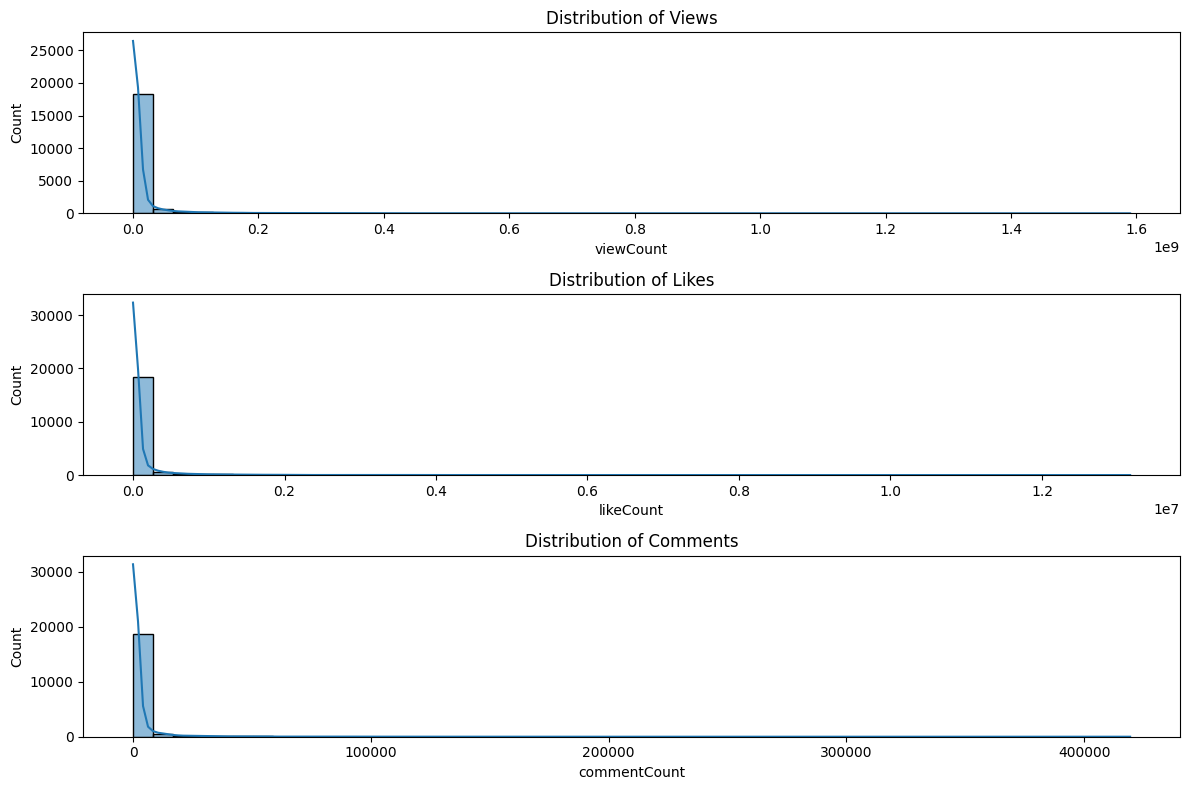

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.histplot(all_stats_df['viewCount'], bins=50, kde=True)
plt.title('Distribution of Views')

plt.subplot(3, 1, 2)
sns.histplot(all_stats_df['likeCount'], bins=50, kde=True)
plt.title('Distribution of Likes')

plt.subplot(3, 1, 3)
sns.histplot(all_stats_df['commentCount'], bins=50, kde=True)
plt.title('Distribution of Comments')
plt.tight_layout()
plt.show()


### Correlation Analysis

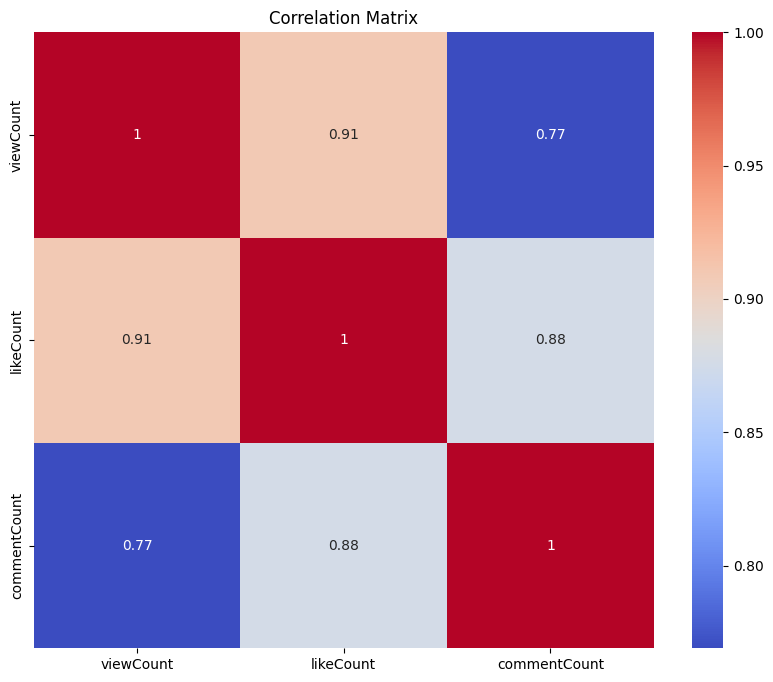

In [5]:

corr_matrix = all_stats_df[['viewCount', 'likeCount', 'commentCount']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Visualization

### Top Videos by Views, Likes, and Comments

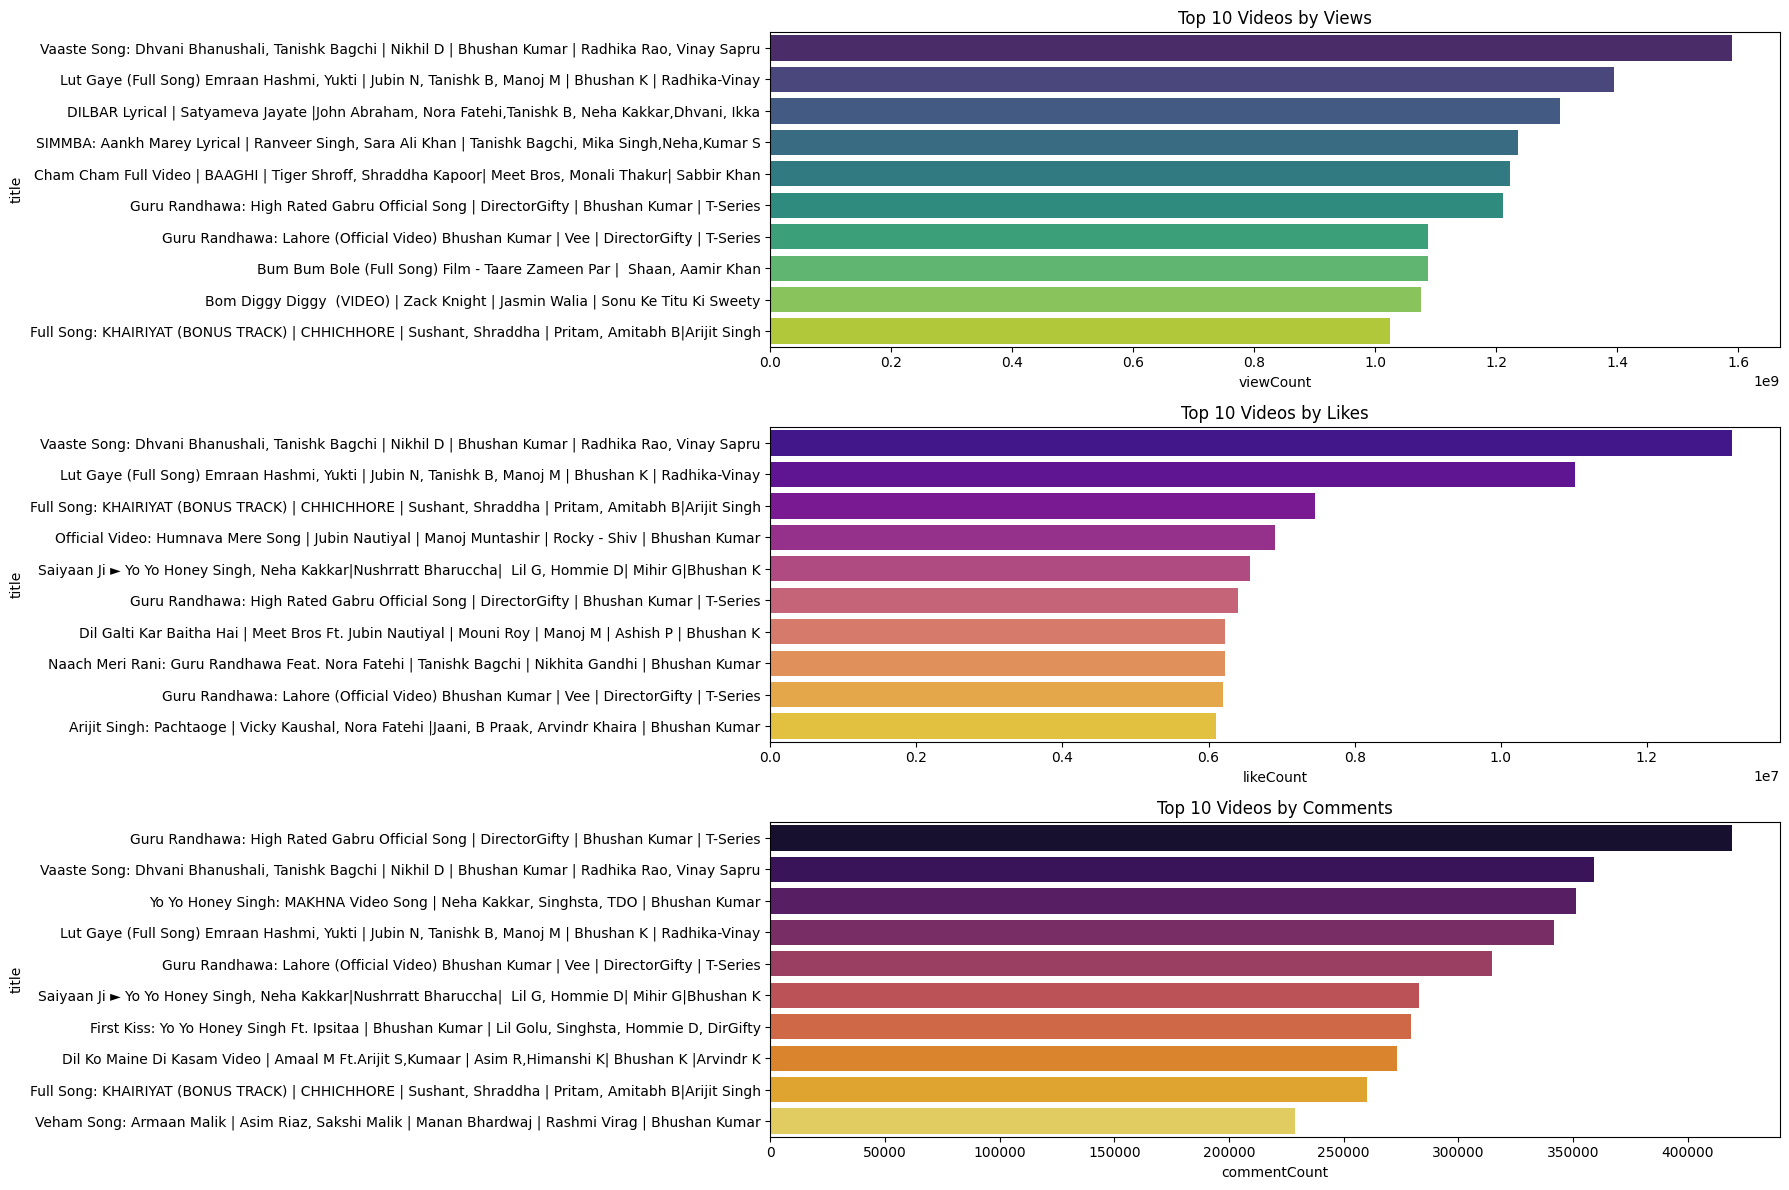

In [6]:
top_views = top_1000_details_df.nlargest(10, 'viewCount')
top_likes = top_1000_details_df.nlargest(10, 'likeCount')
top_comments = top_1000_details_df.nlargest(10, 'commentCount')

plt.figure(figsize=(18, 12))
plt.subplot(3, 1, 1)
sns.barplot(x='viewCount', y='title', data=top_views, palette='viridis')
plt.title('Top 10 Videos by Views')
plt.subplot(3, 1, 2)
sns.barplot(x='likeCount', y='title', data=top_likes, palette='plasma')
plt.title('Top 10 Videos by Likes')
plt.subplot(3, 1, 3)
sns.barplot(x='commentCount', y='title', data=top_comments, palette='inferno')
plt.title('Top 10 Videos by Comments')
plt.tight_layout()
plt.show()

### Sentiment Analysis of Video Descriptions

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


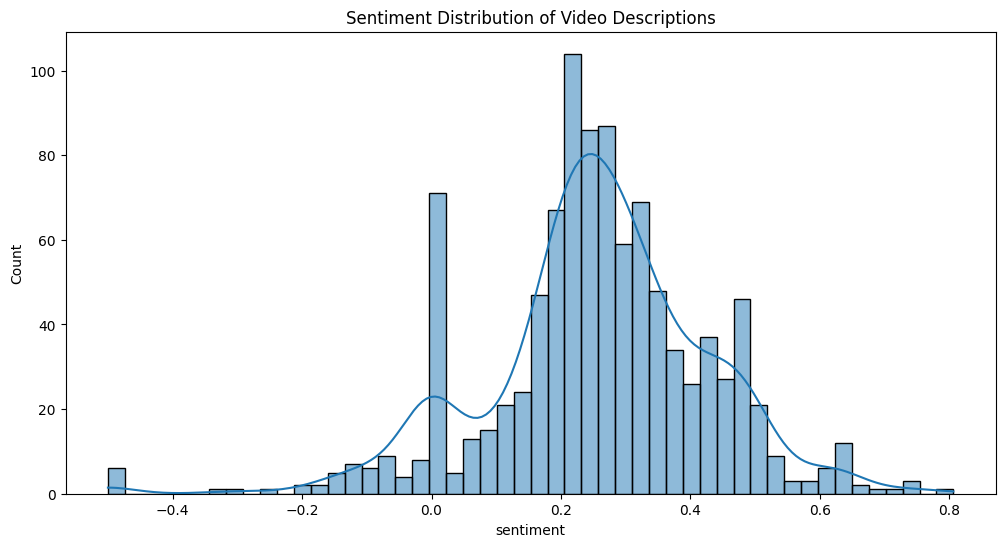

In [7]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

top_1000_details_df['sentiment'] = top_1000_details_df['description'].apply(get_sentiment)

plt.figure(figsize=(12, 6))
sns.histplot(top_1000_details_df['sentiment'], bins=50, kde=True)
plt.title('Sentiment Distribution of Video Descriptions')
plt.show()


### Time Series Analysis

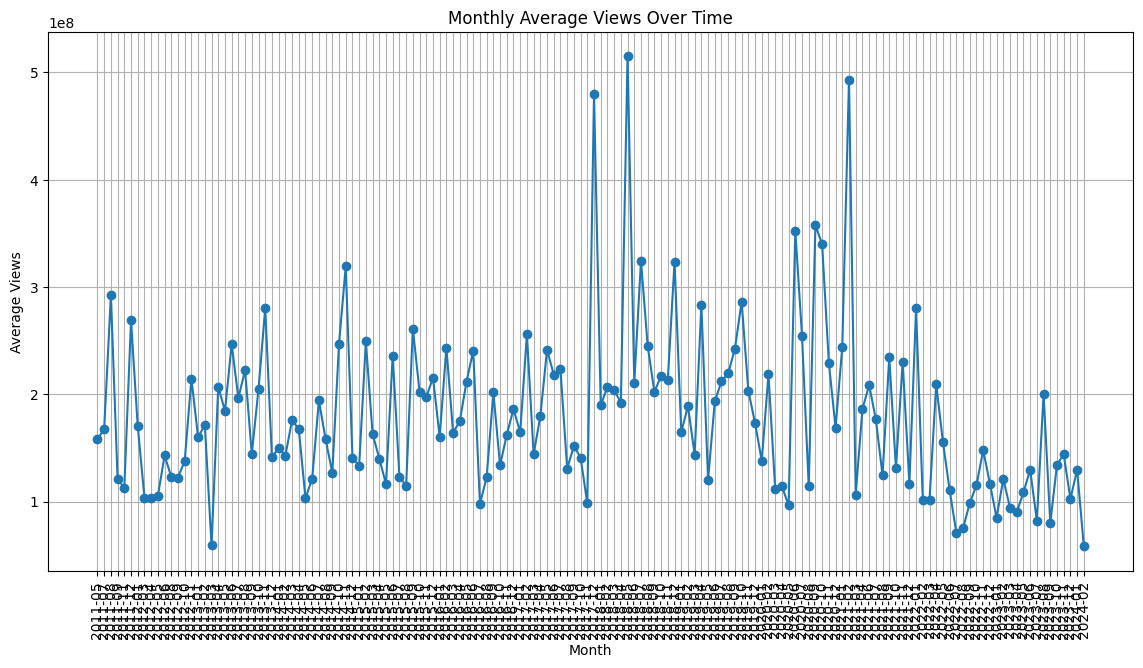

In [8]:
top_1000_details_df['published_at'] = top_1000_details_df['published_at'].dt.tz_localize(None)

top_1000_details_df['year_month'] = top_1000_details_df['published_at'].dt.to_period('M')

monthly_views = top_1000_details_df.groupby('year_month')['viewCount'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(monthly_views['year_month'].astype(str), monthly_views['viewCount'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Average Views Over Time')
plt.xlabel('Month')
plt.ylabel('Average Views')
plt.grid(True)
plt.show()

## Insights

Based on the analyses performed, here are some key insights:
   1. **Distribution of Views, Likes, and Comments**:
       - The majority of the videos have relatively low view counts, but there are some with exceptionally high views, indicating a few viral hits.
       - The distribution of likes and comments follows a similar pattern to views, with a few videos having extremely high engagement.
   2. **Correlation Analysis**:
       - There is a strong positive correlation between views and likes, indicating that videos with higher views tend to receive more likes.
       - There is also a significant correlation between views and comments, suggesting that more popular videos generate more discussion.
   3. **Top Videos**:
       - The top 10 videos by views, likes, and comments are dominated by popular songs and music videos, reflecting T-Series' primary focus on music content.
       - These videos feature popular Bollywood artists and have strong engagement, with millions of likes and thousands of comments.
   4. **Sentiment Analysis**:
       - The sentiment of video descriptions tends to be positive or neutral, with very few negative sentiments.
       - This is expected as video descriptions are promotional in nature and aim to attract viewers.
   5. **Time Series Analysis**:
       - The monthly average views show some seasonality and trends, with certain months experiencing higher view counts.
       - This could be attributed to the release of popular songs or festive seasons when people tend to consume more entertainment content.

## Conclusion
The T-Series YouTube channel's success is driven by a few key factors:
   - **High Engagement**: Videos with high view counts also tend to receive a significant number of likes and comments, indicating strong audience engagement.
   - **Popular Content**: Music videos and songs, especially those featuring well-known Bollywood artists, are the main drivers of high views and engagement.
   - **Positive Sentiment**: The overall positive sentiment in video descriptions helps in promoting content effectively.
   - **Seasonal Trends**: Understanding the seasonal trends in viewership can help in planning the release of new content to maximize views and engagement.
   Overall, T-Series' focus on popular music content, combined with effective promotional strategies, has resulted in its position as the most viewed and subscribed YouTube channel.